In [247]:
import pandas as pd
import os
import seaborn as sns

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_column', None)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 4)
col_sur = ['#78c679','#f03b20'] # pallet for survival
col_class = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e'] # pallet for class
col_gen = ['#f768a1', '#2c7fb8', '#fd8d3c', '#a6611a', '#8856a7'] # pallet for gender
green = ['#31a354']

In [248]:
train_data = pd.read_csv(r"https://raw.githubusercontent.com/AleaBarP/ML_tasks_open/master/train.csv", encoding = 'unicode_escape')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Having a look at dataset we can make some changes for further easier work   

In [249]:
#Turning cabin number into Deck and add new column 'Deck'
import re
train_data['Deck'] = train_data['Cabin'].map(lambda x: re.search('[A-Z]', x)[0],  na_action='ignore')
train_data.loc[train_data['Deck'].isna(), 'Deck'] = 'Unknown'
print('Column Deck values and their ammount:\n',train_data['Deck'].value_counts())

Column Deck values and their ammount:
 Unknown    67866
C          11825
B           7439
A           6307
D           3637
E           1749
F            663
G            482
T             32
Name: Deck, dtype: int64


In [250]:
# Add new column "Family size" as sum of SibSp and Parch
train_data['Family_size'] = train_data.SibSp + train_data.Parch +1

In [251]:
# PassengerId column information isn't needed, drop this column
train_data.drop("PassengerId", axis=1, inplace=True)

In [252]:
# Additional function to show x values on barplot
def bar_values_show(bar_plot):
    for p in bar_plot.patches:
        bar_plot.annotate(round(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', color='black', xytext = (0, 10), textcoords = 'offset points')

# Context

1.1 Check duplicates
1.2 Check for NaN values, values format 
1.3 Change values to make clearer understanding of them  
1.4 Show outliers
2.1 Show people ammount and gender ratio in each class and deck 
2.2 Show passanger distribution of age via class/deck and survival
2.3 Show family size distribution via class/deck and survival
2.4 Show port of embarkation and class/survival ratio
3.1 Sum up

# Data quality assessment

In [253]:
# check for duplicated rows
train_data.loc[train_data.duplicated()].shape[0]

0

In [254]:
# check for NaN values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Survived     100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96708 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       95377 non-null   object 
 8   Fare         99866 non-null   float64
 9   Cabin        32134 non-null   object 
 10  Embarked     99750 non-null   object 
 11  Deck         100000 non-null  object 
 12  Family_size  100000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 9.9+ MB


columns 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked' have NaN values

In [255]:
# ammount of NaN values
train_data.loc[train_data['Age'].isna()].shape[0] # 3292
train_data.loc[train_data['Ticket'].isna()].shape[0] # 4623
train_data.loc[train_data['Fare'].isna()].shape[0] # 134
train_data.loc[train_data['Cabin'].isna()].shape[0] # 67866
train_data.loc[train_data['Embarked'].isna()].shape[0] # 250

# replace NaN with "Unknown"
train_data.loc[train_data['Age'].isna(), 'Age'] = 0
train_data.loc[train_data['Ticket'].isna(), 'Ticket']  = 'Unknown'
train_data.loc[train_data['Fare'].isna(), 'Fare']  = 0
train_data.loc[train_data['Cabin'].isna(), 'Cabin']  = 'Unknown'
train_data.loc[train_data['Embarked'].isna(), 'Embarked']  = 'Unknown'

# check for NaN values
train_data.isna().value_counts()

Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked  Deck   Family_size
False     False   False  False  False  False  False  False   False  False  False     False  False          100000
dtype: int64

In [256]:
# check for string value strips
train_data.Sex.value_counts().index   # Sex values has no left or right strips

Index(['male', 'female'], dtype='object')

In [257]:
train_data.Embarked.value_counts().index # Embarked values has no left or right strips

Index(['S', 'C', 'Q', 'Unknown'], dtype='object')

In [258]:
# check for Name format
train_data.Name.map(lambda x: re.search(r'^[A-Za-z]+,\s[A-Za-z]+$', x)[0]).shape[0] # Name values have same format

100000

In [259]:
# check fot Pclass and Survived value format
train_data['Survived'].value_counts(), train_data['Pclass'].value_counts()

(0    57226
 1    42774
 Name: Survived, dtype: int64,
 3    41006
 1    30315
 2    28679
 Name: Pclass, dtype: int64)

In [260]:
# Make clearer Survived and Embarked columns values
train_data['Alive'] = train_data['Survived'] # create column for scatter plot with 0 or 1 for survived
train_data.loc[(train_data['Survived'] == 0), 'Survived'] = 'Not survived'
train_data.loc[(train_data['Survived'] == 1), 'Survived'] = 'Survived'
train_data.loc[(train_data['Embarked'] == 'S'), 'Embarked'] = 'Southampton'
train_data.loc[(train_data['Embarked'] == 'C'), 'Embarked'] = 'Cherbourg'
train_data.loc[(train_data['Embarked'] == 'Q'), 'Embarked'] = 'Queenstown'

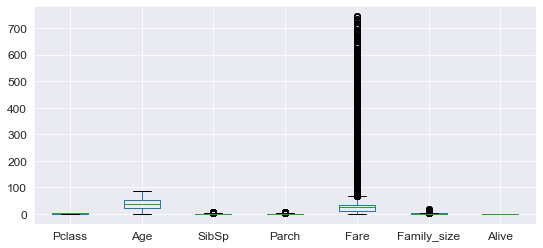

In [261]:
# outliers
pl0 = train_data.boxplot()
plt.show(pl0)

Fare values is likely to have outlets

# Data exploration

In [262]:
#preliminary insights into data
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_size,Alive
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.106910,37.09281,0.397690,0.454560,43.870465,1.852250,0.427740
std,0.837727,19.26607,0.862566,0.950076,69.560745,1.412792,0.494753
min,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,24.00000,0.000000,0.000000,10.020000,1.000000,0.000000
50%,2.000000,38.00000,0.000000,0.000000,24.440000,1.000000,0.000000
75%,3.000000,53.00000,1.000000,1.000000,33.470000,2.000000,1.000000
max,3.000000,87.00000,8.000000,9.000000,744.660000,18.000000,1.000000


Passengers in common were middle-aged, had middle class and travelled together.

 - Number of people in each class and gender ratio vs survival:

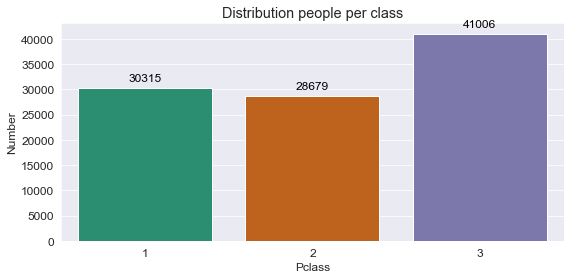

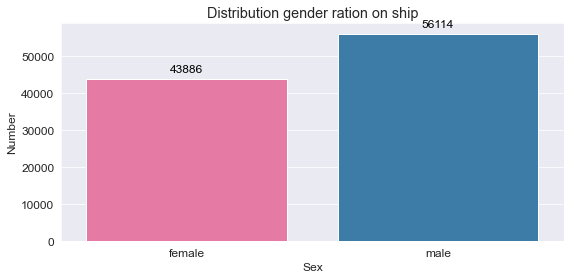

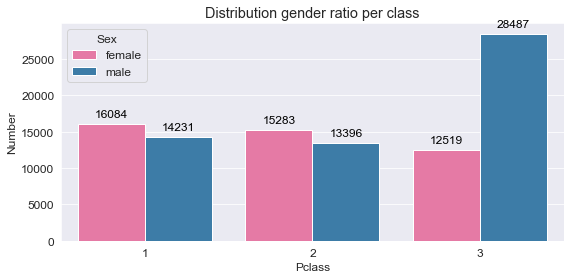

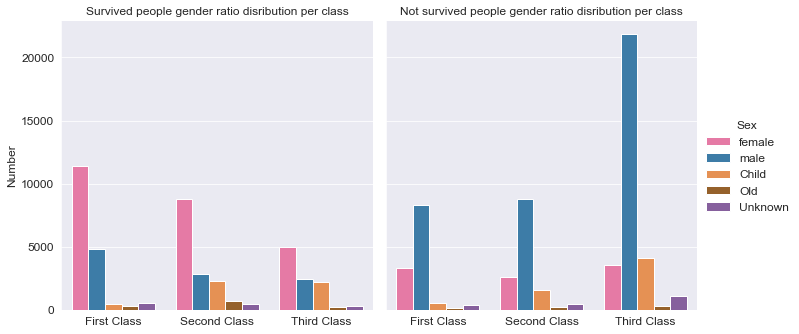

In [263]:
tr_class, tr_sex = train_data.groupby('Pclass')['Pclass'].count(), train_data.groupby('Sex')['Sex'].count() 
tr_cl_sex = train_data[['Sex', 'Pclass']].groupby(['Pclass', 'Sex']).size().to_frame().reset_index()

tr_gen = pd.DataFrame(train_data[['Sex', 'Pclass', 'Age', 'Survived']])
tr_gen.loc[(tr_gen['Age'] < 16), 'Sex'] = 'Child'
tr_gen.loc[(tr_gen['Age'] == 0), 'Sex'] = 'Unknown'
tr_gen.loc[(tr_gen['Age'] > 70), 'Sex'] = 'Old'
tr_gen = tr_gen.groupby(['Pclass', 'Sex', 'Survived']).size().to_frame().reset_index()

pl1 = sns.barplot(x = tr_class.index, y = tr_class.values, palette = col_class)
bar_values_show(pl1)
plt.title('Distribution people per class')
plt.ylabel("Number")
plt.show(pl1)

pl2 = sns.barplot(x = tr_sex.index, y = tr_sex.values, palette = col_gen)
bar_values_show(pl2)
plt.title('Distribution gender ration on ship')
plt.ylabel("Number")
plt.show(pl2)

pl3 = sns.barplot(x = tr_cl_sex['Pclass'], y = tr_cl_sex[0] , hue = tr_cl_sex['Sex'], palette = col_gen)
bar_values_show(pl3)
plt.title('Distribution gender ratio per class')
plt.ylabel("Number")
plt.show(pl3)

pl4 = sns.catplot(x = 'Pclass', y = 0, col = 'Survived', hue = 'Sex', data = tr_gen, kind="bar",
                 hue_order = ['female', 'male', 'Child', 'Old','Unknown'], col_order = ['Survived', 'Not survived'], 
                 palette = col_gen)
(pl4.set_axis_labels("", "Number")
    .set_xticklabels(["First Class", "Second Class", "Third Class"])
    .set_titles("{col_name} people gender ratio disribution per class"))
plt.show(pl4)

Passenger ammount and gender ratio in common equal per class, except third class with more men ratio.
Among survival people more women for each class

 - Number of people for deck and survival vs deck

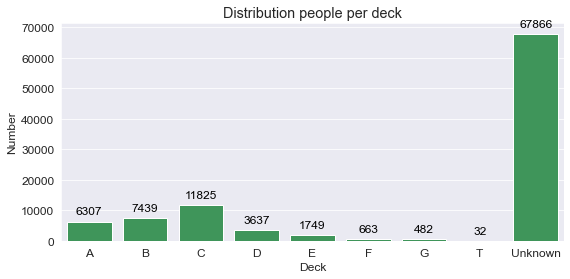

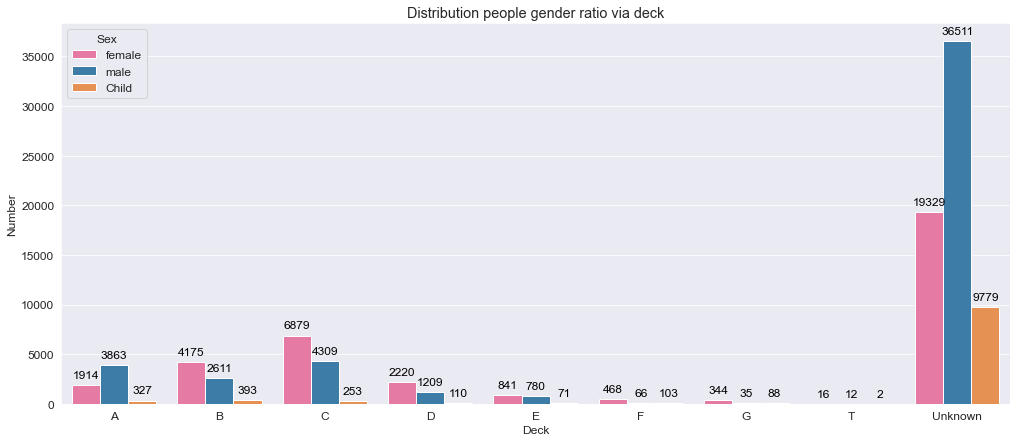

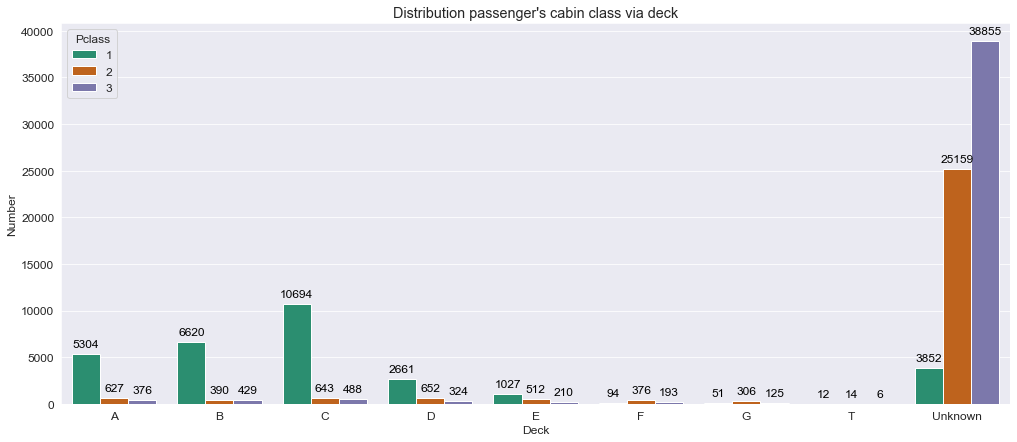

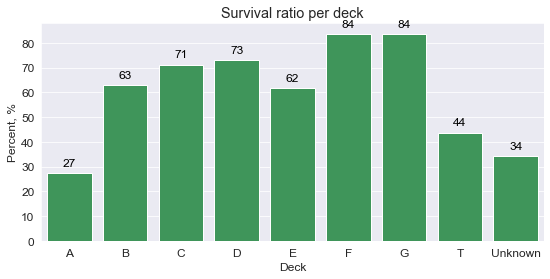

In [264]:
tr_dk = train_data.groupby('Deck')['Deck'].count()
tr_deck = pd.DataFrame(train_data[['Sex', 'Deck', 'Age', 'Survived', 'Pclass']])
tr_deck.loc[(tr_deck['Age'] < 16), 'Sex'] = 'Child'
tr_deck.loc[(tr_deck['Age'] == 0), 'Sex'] = 'Unknown'
tr_deck1 = tr_deck.groupby(['Deck', 'Survived']).size().to_frame().reset_index()
tr_deck2 = tr_deck.groupby(['Deck', 'Sex']).size().to_frame().reset_index()
tr_deck3 = tr_deck.groupby(['Deck', 'Pclass']).size().to_frame().reset_index()
tr_deck4 = tr_deck.groupby(['Deck', 'Age']).size().to_frame().reset_index()

tr_decksur = tr_deck.loc[(tr_deck.Survived == 'Survived'), ['Deck']].value_counts(sort = False).to_frame().reset_index()
tr_decksur['Not_sur'] = tr_deck.loc[(tr_deck.Survived == 'Not survived'), ['Deck']].\
                        value_counts(sort = False).to_frame().reset_index()[0]
tr_decksur['Survival ratio'] = tr_decksur[0]/(tr_decksur[0] + tr_decksur['Not_sur'])*100

pl5 = sns.barplot(x = tr_dk.index, y = tr_dk.values, palette = green)
bar_values_show(pl5)
plt.title('Distribution people per deck')
plt.ylabel("Number")
plt.show(pl5)

plt.figure(figsize=(17,7))
pl6 = sns.barplot(x = 'Deck', hue = 'Sex', y = 0, data = tr_deck2, hue_order = ['female', 'male', 'Child'],
                  palette = col_gen)
bar_values_show(pl6)
plt.ylabel("Number")
plt.title("Distribution people gender ratio via deck")
plt.show(pl6)

plt.figure(figsize=(17,7))
pl7 = sns.barplot(x = 'Deck', hue = 'Pclass', y = 0, data = tr_deck3, 
                  palette = col_class)
bar_values_show(pl7)
plt.ylabel("Number")
plt.title("Distribution passenger's cabin class via deck")
plt.show(pl7)

pl8 = sns.barplot(x = 'Deck', y = 'Survival ratio' , data = tr_decksur, palette = green)
bar_values_show(pl8)
plt.ylabel("Percent, %")
plt.title("Survival ratio per deck")
plt.show(pl8)

Among the known values we can see that more passenders were on deck C and known cabins were of first class. For all deck among survival people more women except deck A. Survival ration in common equal and is between 65-85%, but very low for deck A, T - 27-34%. Also low survival ratio among passangers with unknown cabin. 

 - Distribution of passengers' age vs survival

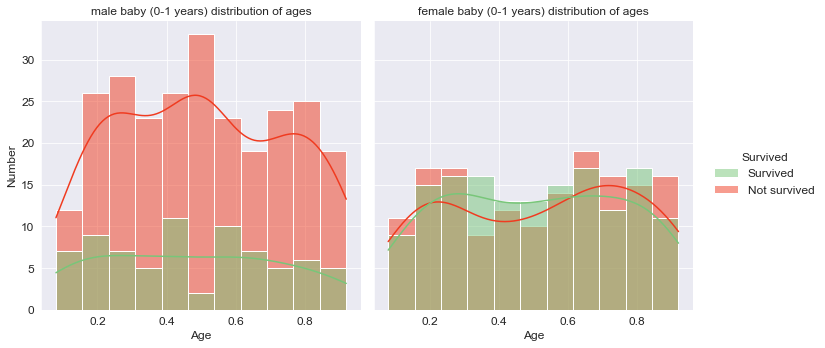

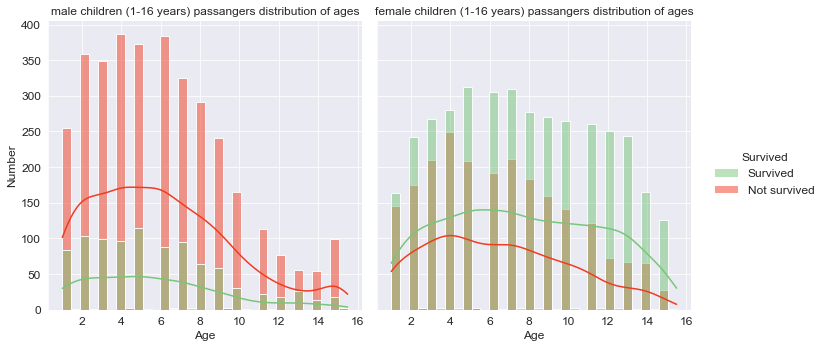

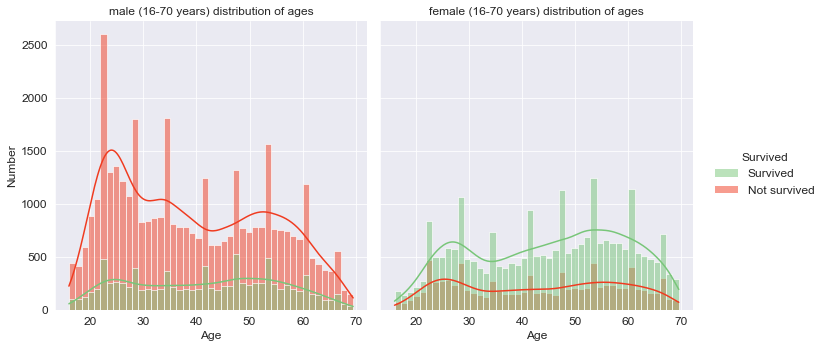

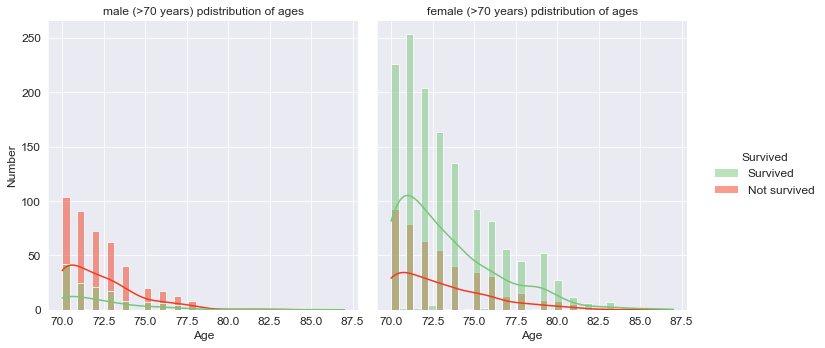

In [265]:
tr_age1 = pd.DataFrame(train_data.loc[((train_data['Age'] > 0)&(train_data['Age'] <1)),['Age', 'Survived', 'Sex']])
tr_age2 = pd.DataFrame(train_data.loc[((train_data['Age'] >= 1)&(train_data['Age'] <16)),['Age', 'Survived', 'Sex']])
tr_age3 = pd.DataFrame(train_data.loc[((train_data['Age'] >= 16)&(train_data['Age'] <70)),['Age', 'Survived', 'Sex']])
tr_age4 = pd.DataFrame(train_data.loc[((train_data['Age'] >= 70)&(train_data['Age'] <100)),['Age', 'Survived', 'Sex']])

pl9 = sns.displot(data=tr_age1, x ='Age',  hue = 'Survived', kde = True, col="Sex", 
                   hue_order = ['Survived', 'Not survived'], palette = col_sur)
pl9.set_axis_labels("Age", "Number")
pl9.set_titles('{col_name} baby (0-1 years) distribution of ages')
plt.show(pl9)

pl10 = sns.displot(data=tr_age2, x ='Age',  hue = 'Survived', kde = True, col="Sex", 
                   hue_order = ['Survived', 'Not survived'], palette = col_sur)
pl10.set_axis_labels("Age", "Number")
pl10.set_titles('{col_name} children (1-16 years) passangers distribution of ages')
plt.show(pl10)

pl11 = sns.displot(data=tr_age3, x ='Age',  hue = 'Survived', kde = True, col="Sex", 
                   hue_order = ['Survived', 'Not survived'], palette = col_sur)
pl11.set_axis_labels("Age", "Number")
pl11.set_titles('{col_name} (16-70 years) distribution of ages')
plt.show(pl11)

pl12 = sns.displot(data=tr_age4, x ='Age',  hue = 'Survived', kde = True, col="Sex", 
                   hue_order = ['Survived', 'Not survived'], palette = col_sur)
pl12.set_axis_labels("Age", "Number")
pl12.set_titles('{col_name} (>70 years) pdistribution of ages')
plt.show(pl12)


For all ages gaps men ration survival less then women, except eldery people(more 80 ages) where survived people more both among women and men. For baby girls ammount for survived and not survived in common are equal, while for other female age gaps survived ration is higher.    

 - Passanger fare per deck

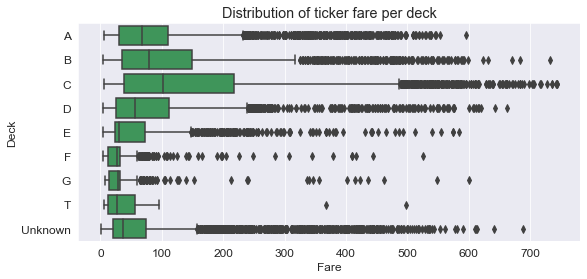

Deck A: fare mean is 94.92
Deck B: fare mean is 109.58
Deck C: fare mean is 140.76
Deck D: fare mean is 88.92
Deck E: fare mean is 63.02
Deck F: fare mean is 35.83
Deck G: fare mean is 41.38
Deck T: fare mean is 57.03
Unknown deck: fare mean is 63.67


In [266]:
train = train_data.loc[(train_data.Fare != 0),['Fare', 'Deck', 'Pclass', 'Survived']].\
groupby(['Deck', 'Fare']).size().to_frame().reset_index()
pl13 = sns.boxplot(y='Deck', x='Fare', data=train, palette = green ) 
plt.title('Distribution of ticker fare per deck')
plt.show(pl13)
print('Deck A: fare mean is',round((train.loc[(train.Deck == 'A'), 'Fare'].mean()),2))
print('Deck B: fare mean is',round((train.loc[(train.Deck == 'B'), 'Fare'].mean()),2))
print('Deck C: fare mean is',round((train.loc[(train.Deck == 'C'), 'Fare'].mean()),2))
print('Deck D: fare mean is',round((train.loc[(train.Deck == 'D'), 'Fare'].mean()),2))
print('Deck E: fare mean is',round((train.loc[(train.Deck == 'E'), 'Fare'].mean()),2))
print('Deck F: fare mean is',round((train.loc[(train.Deck == 'F'), 'Fare'].mean()),2))
print('Deck G: fare mean is',round((train.loc[(train.Deck == 'G'), 'Fare'].mean()),2))
print('Deck T: fare mean is',round((train.loc[(train.Deck == 'T'), 'Fare'].mean()),2))
print('Unknown deck: fare mean is',round((train.loc[(train.Deck == 'Unknown'), 'Fare'].mean()),2))

Fare distribution per deck have a lot of outliers and have a mean from 35 to 140

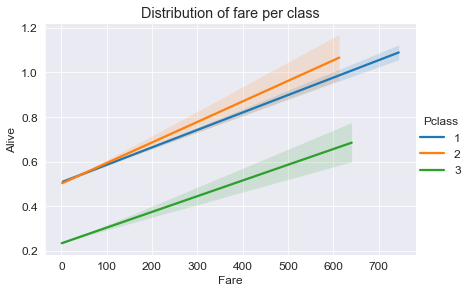

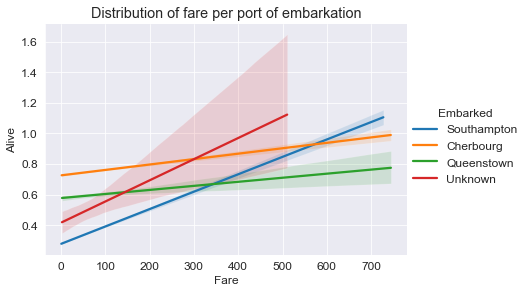

In [267]:
pl14 = sns.lmplot(x="Fare", y="Alive", hue="Pclass", data=train_data.loc[train_data['Fare']>0], 
           scatter = False, height = 4, aspect = 1.5)
plt.title('Distribution of fare per class')
plt.show(pl14)

pl15 = sns.lmplot(x="Fare", y="Alive", hue="Embarked", data=train_data.loc[train_data['Fare']>0], 
           scatter = False, height = 4, aspect = 1.5)
plt.title('Distribution of fare per port of embarkation')
plt.show(pl15)

Fare distributions per class and port of embarkation show that people with more ticket fare is more likely survived   

 - Family size vs survival

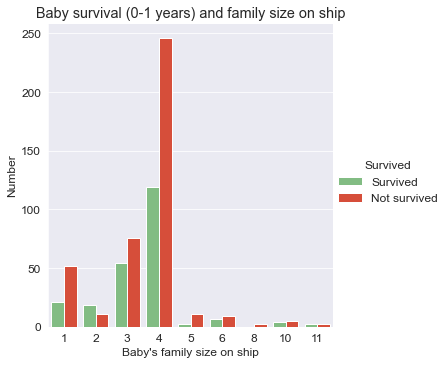

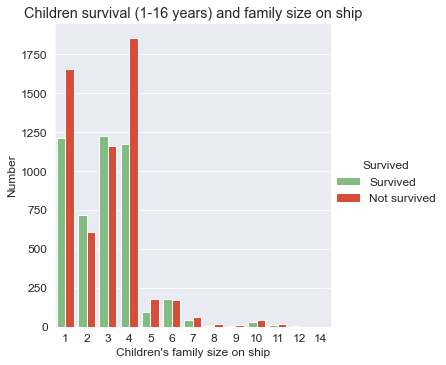

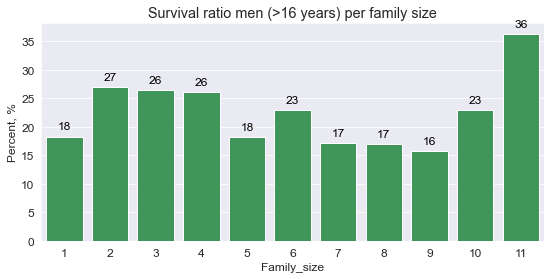

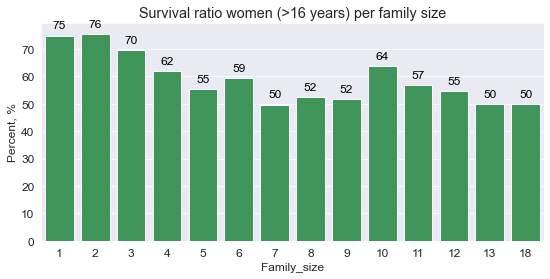

In [268]:
tr_fam = pd.DataFrame(train_data[['Family_size', 'Survived', 'Sex', 'Age', 'Parch', 'SibSp']])

tr_famg = pd.DataFrame(tr_fam.loc[(tr_fam['Age']>15)&(tr_fam['Sex'] == 'male')])
tr_famgfe = pd.DataFrame(tr_fam.loc[(tr_fam['Age']>15)&(tr_fam['Sex'] == 'female')])
tr_famg_ratio = tr_famg.loc[(tr_famg.Survived == 'Survived'), ['Family_size']].\
value_counts(sort = False).to_frame().reset_index()
tr_famg_ratio['Not_sur_men'] = tr_famg.loc[(tr_famg.Survived == 'Not survived'), ['Family_size']].\
value_counts(sort = False).to_frame().reset_index()[0]
tr_famg_ratio['Men_sur_ratio'] = tr_famg_ratio[0]/(tr_famg_ratio[0]+tr_famg_ratio['Not_sur_men'])*100

tr_famgfe_ratio = tr_famgfe.loc[(tr_famgfe.Survived == 'Survived'), ['Family_size']].\
value_counts(sort = False).to_frame().reset_index()
tr_famgfe_ratio['Not_sur_women'] = tr_famgfe.loc[(tr_famgfe.Survived == 'Not survived'), ['Family_size']].\
value_counts(sort = False).to_frame().reset_index()[0]
tr_famgfe_ratio['Women_sur_ratio'] = tr_famgfe_ratio[0]/(tr_famgfe_ratio[0]+tr_famgfe_ratio['Not_sur_women'])*100

pl16 = sns.catplot(x = 'Family_size', hue = 'Survived', 
                   data = tr_fam.loc[(tr_fam['Family_size']>0)&(tr_fam['Age']<1)&(tr_fam['Age']>0)], 
                   kind="count", palette = col_sur, hue_order = ['Survived', 'Not survived'])
pl16.set_axis_labels("Baby's family size on ship", "Number")
plt.title("Baby survival (0-1 years) and family size on ship")
plt.show(pl16)


pl17 = sns.catplot(x = 'Family_size', hue = 'Survived', 
                   data = tr_fam.loc[(tr_fam['Family_size']>0)&(tr_fam['Age']<16)&(tr_fam['Age']>=1)], kind="count",
                   palette = col_sur, hue_order = ['Survived', 'Not survived'])
pl17.set_axis_labels("Children's family size on ship", "Number")
plt.title("Children survival (1-16 years) and family size on ship")
plt.show(pl17)

pl18 = sns.barplot(x = 'Family_size', y = 'Men_sur_ratio' , data = tr_famg_ratio, palette = green)
bar_values_show(pl18)
plt.ylabel("Percent, %")
plt.title("Survival ratio men (>16 years) per family size")
plt.show(pl18)

pl19 = sns.barplot(x = 'Family_size', y = 'Women_sur_ratio' , data = tr_famgfe_ratio, palette = green)
bar_values_show(pl19)
plt.ylabel("Percent, %")
plt.title("Survival ratio women (>16 years) per family size")
plt.show(pl19)


Children and babies have low survival ratio within family size, except ones who travelled together with one of family.
Survival ratio for woman is decreasing with increasing family size on ship. Most women survival ratio is for travelled alone or together with one of family. For men suvival ration is low except big family of 11 peolple on ship.

 - Parch and survival

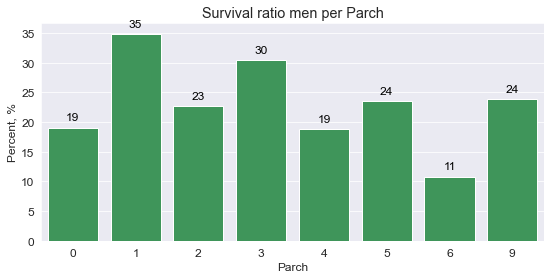

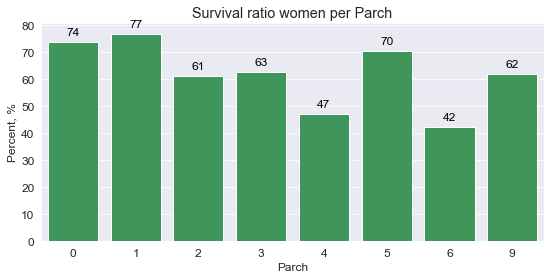

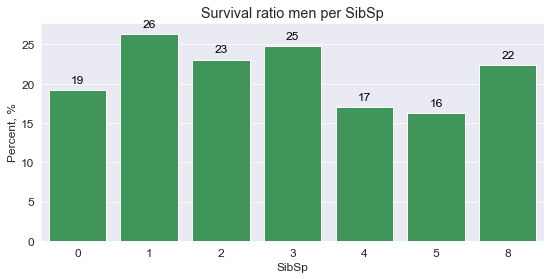

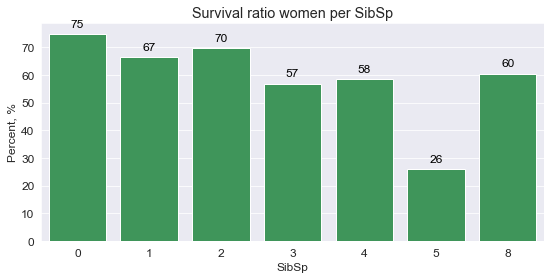

In [269]:
tr_famg2_ratio = tr_famg.loc[(tr_famg.Survived == 'Survived'), ['Parch']].value_counts(sort = False).to_frame().reset_index()
tr_famg2_ratio['Not_sur_men'] = tr_famg.loc[(tr_famg.Survived == 'Not survived'), ['Parch']].value_counts(sort = False).to_frame().reset_index()[0]
tr_famg2_ratio['Men_sur_ratio'] = tr_famg2_ratio[0]/(tr_famg2_ratio[0]+tr_famg2_ratio['Not_sur_men'])*100

tr_famgfe2_ratio = tr_famgfe.loc[(tr_famgfe.Survived == 'Survived'), ['Parch']].value_counts(sort = False).to_frame().reset_index()
tr_famgfe2_ratio['Not_sur_women'] = tr_famgfe.loc[(tr_famgfe.Survived == 'Not survived'), ['Parch']].value_counts(sort = False).to_frame().reset_index()[0]
tr_famgfe2_ratio['Women_sur_ratio'] = tr_famgfe2_ratio[0]/(tr_famgfe2_ratio[0]+tr_famgfe2_ratio['Not_sur_women'])*100

tr_famg3_ratio = tr_famg.loc[(tr_famg.Survived == 'Survived'), ['SibSp']].value_counts(sort = False).to_frame().reset_index()
tr_famg3_ratio['Not_sur_men'] = tr_famg.loc[(tr_famg.Survived == 'Not survived'), ['SibSp']].value_counts(sort = False).to_frame().reset_index()[0]
tr_famg3_ratio['Men_sur_ratio'] = tr_famg3_ratio[0]/(tr_famg3_ratio[0]+tr_famg3_ratio['Not_sur_men'])*100

tr_famgfe3_ratio = tr_famgfe.loc[(tr_famgfe.Survived == 'Survived'), ['SibSp']].value_counts(sort = False).to_frame().reset_index()
tr_famgfe3_ratio['Not_sur_women'] = tr_famgfe.loc[(tr_famgfe.Survived == 'Not survived'), ['SibSp']].value_counts(sort = False).to_frame().reset_index()[0]
tr_famgfe3_ratio['Women_sur_ratio'] = tr_famgfe3_ratio[0]/(tr_famgfe3_ratio[0]+tr_famgfe3_ratio['Not_sur_women'])*100

pl20 = sns.barplot(x = 'Parch', y = 'Men_sur_ratio' , data = tr_famg2_ratio, palette = green)
bar_values_show(pl20)
plt.ylabel("Percent, %")
plt.title("Survival ratio men per Parch")
plt.show(pl20)

pl21 = sns.barplot(x = 'Parch', y = 'Women_sur_ratio' , data = tr_famgfe2_ratio, palette = green)
bar_values_show(pl21)
plt.ylabel("Percent, %")
plt.title("Survival ratio women per Parch")
plt.show(pl21)

pl22 = sns.barplot(x = 'SibSp', y = 'Men_sur_ratio' , data = tr_famg3_ratio, palette = green)
bar_values_show(pl22)
plt.ylabel("Percent, %")
plt.title("Survival ratio men per SibSp")
plt.show(pl22)

pl23 = sns.barplot(x = 'SibSp', y = 'Women_sur_ratio' , data = tr_famgfe3_ratio, palette = green)
bar_values_show(pl23)
plt.ylabel("Percent, %")
plt.title("Survival ratio women per SibSp")
plt.show(pl23)

In common reflect the dependency above for family size

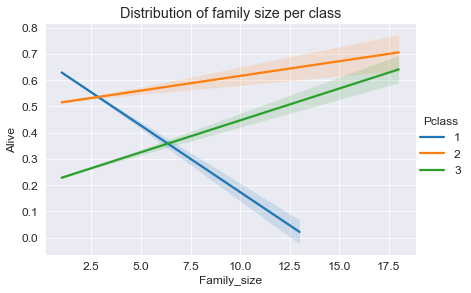

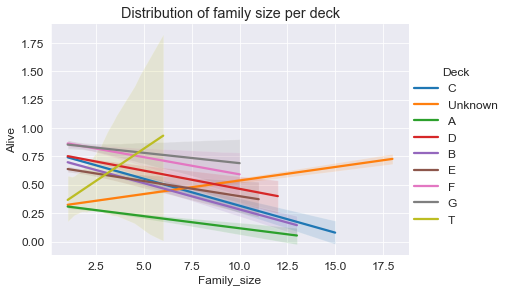

In [270]:
pl24 = sns.lmplot(x="Family_size", y="Alive", hue="Pclass", data=train_data, 
           scatter = False, height = 4, aspect = 1.5)
plt.title('Distribution of family size per class')
plt.show(pl24)
pl25 = sns.lmplot(x="Family_size", y="Alive", hue="Deck", data=train_data, 
           scatter = False, height = 4, aspect = 1.5)
plt.title('Distribution of family size per deck')
plt.show(pl25)

For first class the more family size, the likely passanger not survived, other classes are opposite. People with known cabin except deck T were more likely to survived the less family people with them on ship.  

 - Family size distribution per deck for passangers of first class

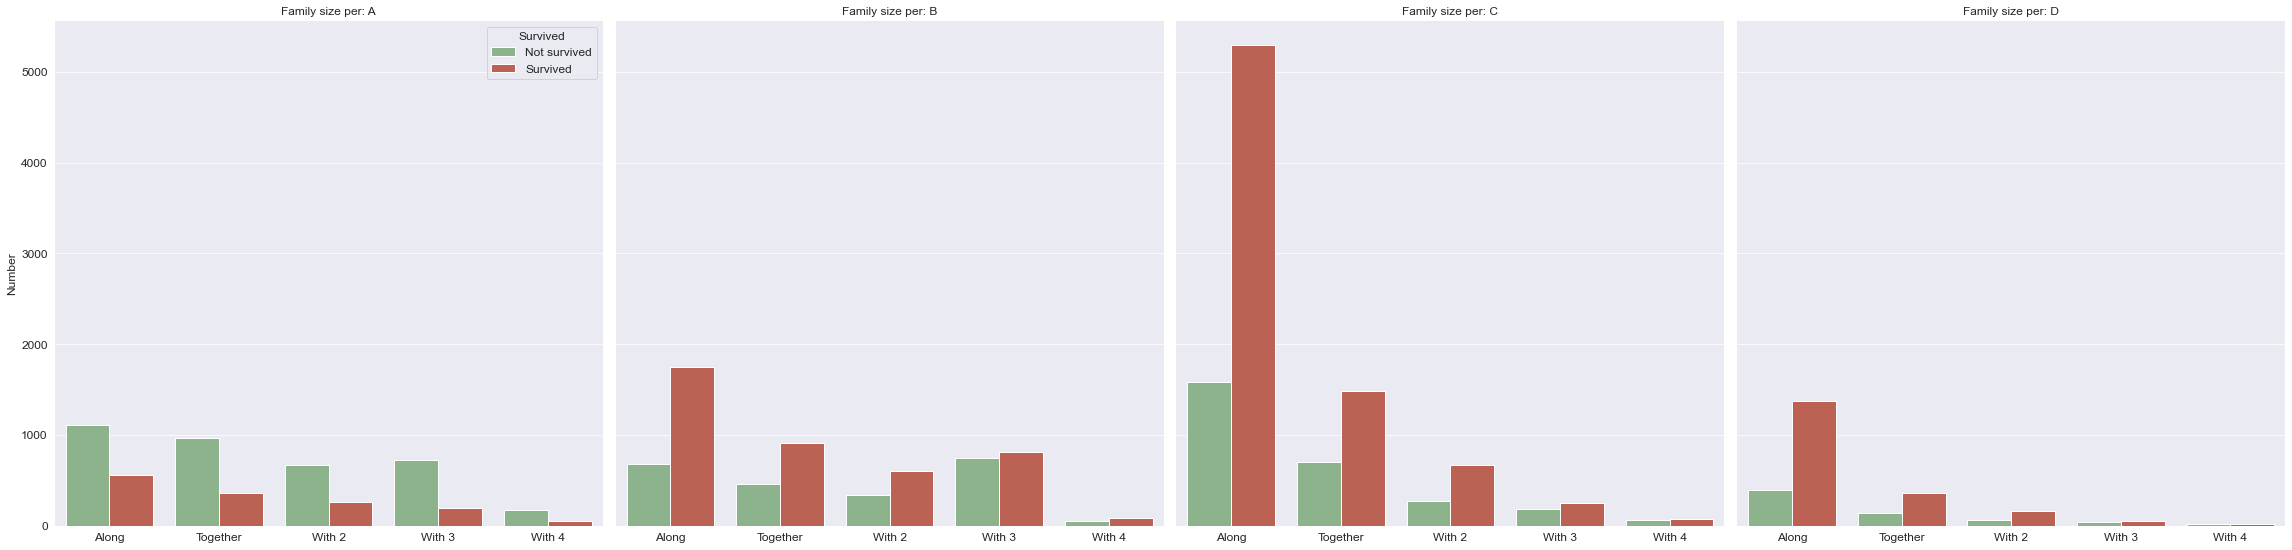

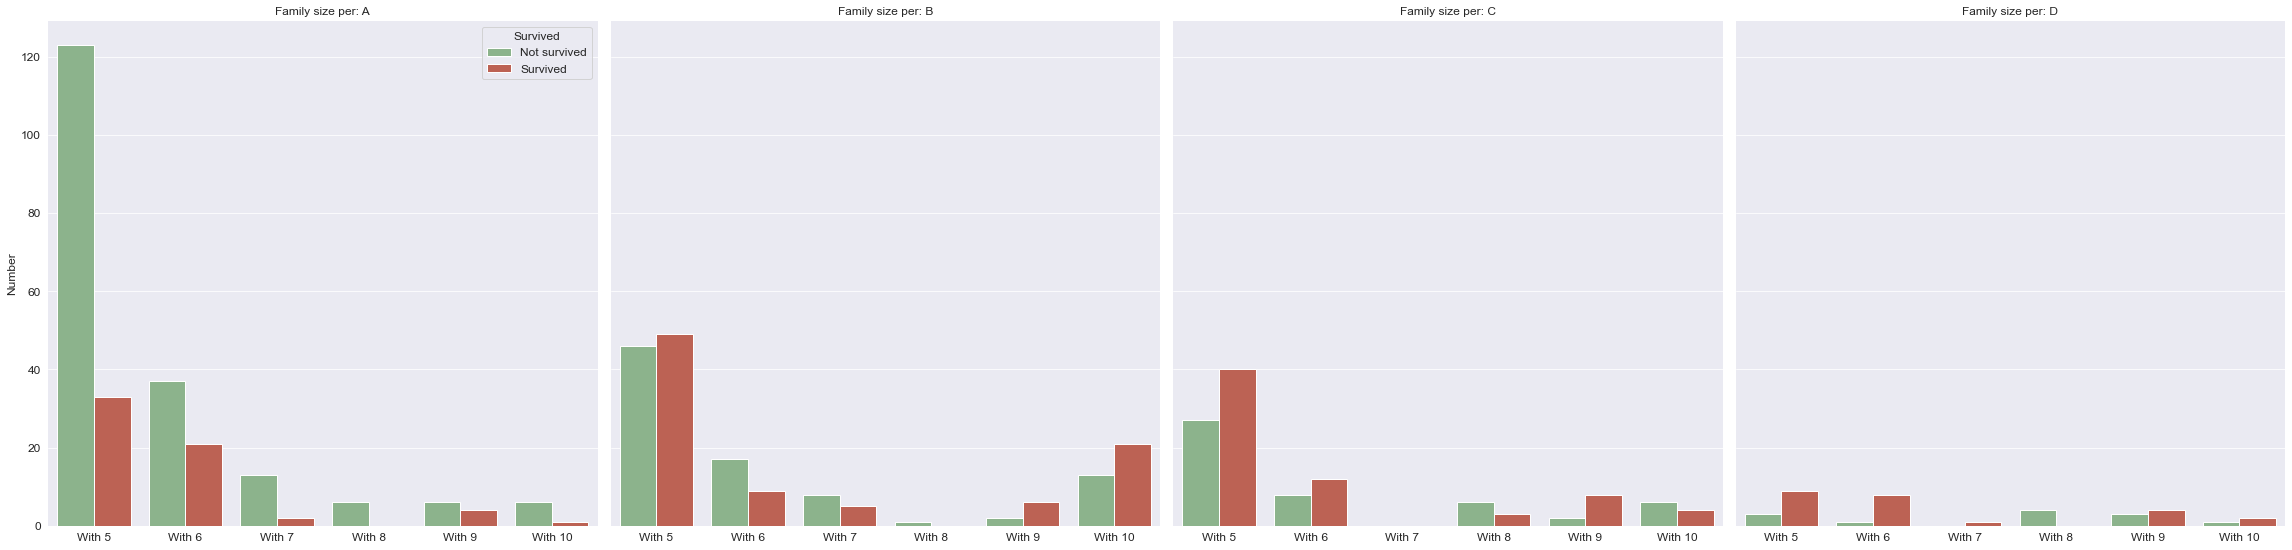

In [272]:
tr_fam = train_data.loc[(train_data['Family_size']<=5) & (train_data['Pclass'] == 1)].\
groupby(['Deck', 'Family_size', 'Survived']).size().to_frame().reset_index()

pl26 = sns.catplot(x='Family_size', y=0, hue= 'Survived', col = "Deck", col_order = ['A', 'B', 'C', 'D'],
                data=tr_fam, saturation=.5, palette=col_sur,
                kind="bar", ci=None, col_wrap=4, height=8, aspect=1, legend_out = False)
(pl26.set_axis_labels("", "Number")
 .set_xticklabels(["Along", "Together", "With 2", "With 3", "With 4"])
 .set_titles("Family size per: {col_name}")
 .despine(left=True))
plt.show(pl26)

tr_fam2 = train_data.loc[(train_data['Family_size']>5) &(train_data['Family_size']<12)& (train_data['Pclass'] == 1)].\
groupby(['Deck', 'Family_size', 'Survived']).size().to_frame().reset_index()

pl27 = sns.catplot(x='Family_size', y=0, hue= 'Survived', col = "Deck", col_order = ['A', 'B', 'C', 'D'],
                data=tr_fam2, saturation=.5, palette=col_sur,
                kind="bar", ci=None, col_wrap=4, height=8, aspect=1, legend_out = False)
(pl27.set_axis_labels("", "Number")
 .set_xticklabels(["With 5", "With 6", "With 7", "With 8", "With 9", 'With 10'])
 .set_titles("Family size per: {col_name}")
 .despine(left=True))
plt.show(pl27)

Most people from 1 class survived on deck A in common regardless travelled they alone or with family, but the most survived among that who was with 5 famile people. Conversely, most people from 1 class didn't survived on deck B, C, D regardless travelled they alone or with family

 - Port of embarkation distributions

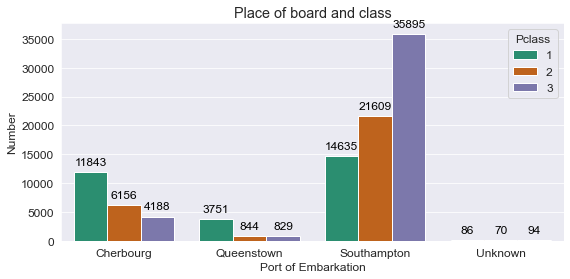

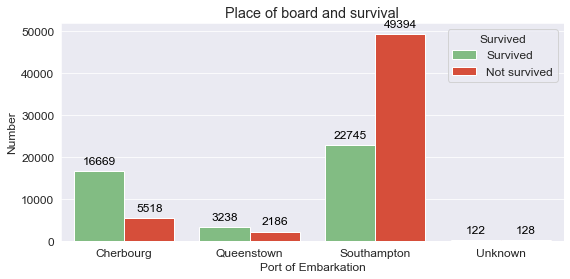

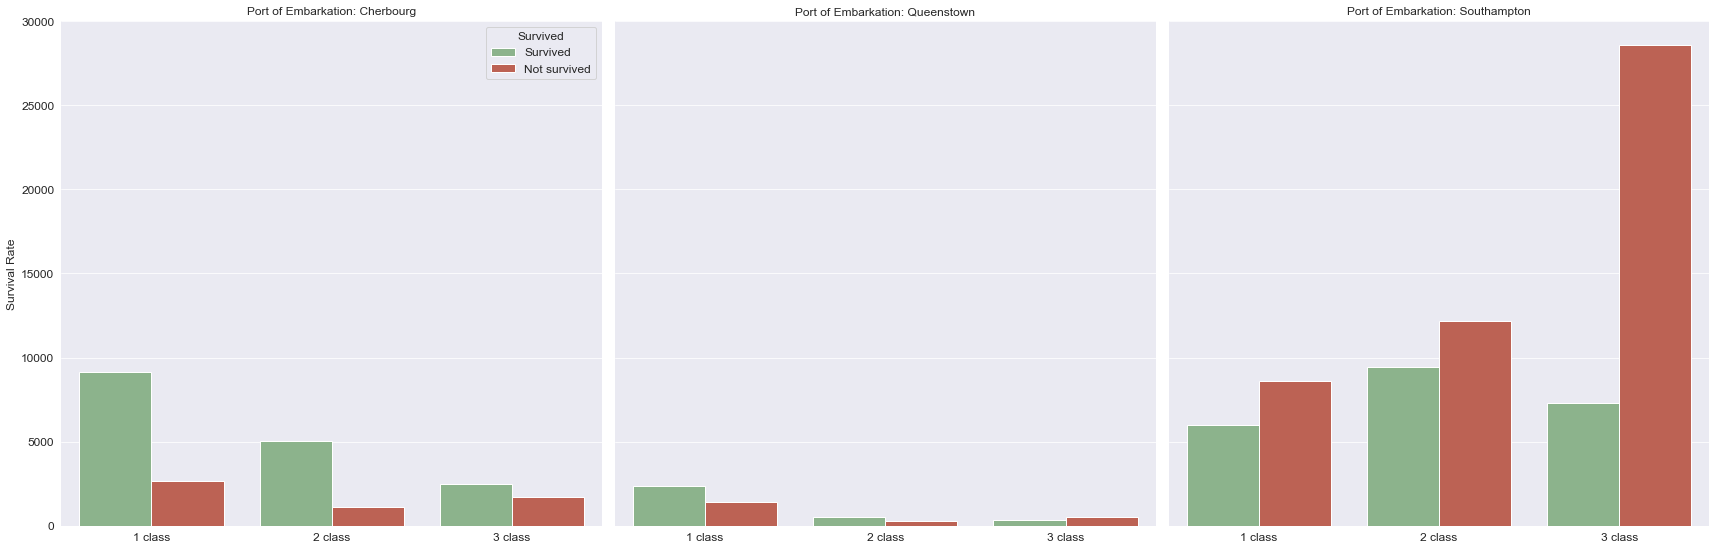

In [273]:
tr_emb_class = train_data.groupby(['Embarked', 'Pclass']).size().to_frame().reset_index()
tr_emb_sur = train_data.groupby(['Embarked', 'Survived']).size().to_frame().reset_index()
tr_emb_sur_class = train_data.groupby(['Embarked', 'Pclass','Survived']).size().to_frame().reset_index()

pl28 = sns.barplot(x = 'Embarked', hue = 'Pclass', y = 0, data = tr_emb_class, palette = col_class)
bar_values_show(pl28)
plt.ylabel("Number")
plt.xlabel('Port of Embarkation')
plt.title("Place of board and class")
plt.show(pl28)

pl29 = sns.barplot(x = 'Embarked', hue = 'Survived', y = 0, data = tr_emb_sur, palette = col_sur, 
                   hue_order = ['Survived', 'Not survived'])
bar_values_show(pl29)
plt.ylabel("Number")
plt.xlabel('Port of Embarkation')
plt.title("Place of board and survival")
plt.show(pl29)

pl30 = sns.catplot(x='Pclass', y=0, hue= 'Survived', col = "Embarked", col_order = ['Cherbourg', 'Queenstown','Southampton'],
                data=tr_emb_sur_class, saturation=.5, palette=col_sur, kind="bar", 
                   col_wrap=3, height=8, aspect=1, legend_out = False, hue_order = ['Survived', 'Not survived'])
(pl30.set_axis_labels("", "Survival Rate")
 .set_xticklabels(["1 class", "2 class", "3 class"])
 .set_titles("Port of Embarkation: {col_name}")
 .despine(left=True))  
plt.show(pl30)

Most people were from the Southampton port, half of them are passengers of third class. Most of them didn't survived regardless the class. Most people from Cherbourg and Queenstown ports are passangers of first class and most of them were survived.  

# Summary

EDA shows relationships between passangers features that may let to undestand in future exploration wether given passanger was survived or not. 